In [ ]:
Names="Frank Xu, Jeremy Granizo"
Course="121"

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import math

%matplotlib inline
import seaborn as sns

In [ ]:
url = 'https://drive.google.com/file/d/151FT1SRybuWMoOmrNWRQ8JN9YgAuKYPw/view?usp=share_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
students = pd.read_csv(path)
students.shape
# students['Grade'] = students['Grade'].replace(to_replace='PK in K-12 Schools', value = -1)
# students['Grade'] = students['Grade'].replace(to_replace='0K', value = 0)
# students = students[students['Grade'].str.contains('All Grades')==False]
# students['Grade'] = students['Grade'].apply(pd.to_numeric)
# students.dropna(how='any', inplace=True)

students = students.replace(to_replace='s', value = np.nan)
students[['# Days Absent', '# Days Present', '% Attendance', '# Contributing 20+ Total Days', '% Chronically Absent', '# Chronically Absent']] = students[['# Days Absent', '# Days Present', '% Attendance', '# Contributing 20+ Total Days', '% Chronically Absent', '# Chronically Absent']].apply(pd.to_numeric)

In [ ]:
students

,DBN,School Name,Grade,Year,Demographic Category,Demographic Variable,# Total Days,# Days Absent,# Days Present,% Attendance,# Contributing 20+ Total Days,# Chronically Absent,% Chronically Absent
0,01M015,P.S. 015 Roberto Clemente,All Grades,2013-14,All Students,All Students,34803,2783.0,32020.0,92.0,216.0,58.0,26.9
1,01M015,P.S. 015 Roberto Clemente,All Grades,2014-15,All Students,All Students,33455,2374.0,31081.0,92.9,197.0,46.0,23.4
2,01M015,P.S. 015 Roberto Clemente,All Grades,2015-16,All Students,All Students,29840,2071.0,27769.0,93.1,186.0,51.0,27.4
3,01M015,P.S. 015 Roberto Clemente,All Grades,2016-17,All Students,All Students,30601,1994.0,28607.0,93.5,193.0,48.0,24.9
4,01M015,P.S. 015 Roberto Clemente,All Grades,2017-18,All Students,All Students,33264,2078.0,31186.0,93.8,195.0,37.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
824141,75X811,P.S. X811,12,2016-17,ELL Status,Not ELL,32558,5543.0,27015.0,83.0,192.0,98.0,51.0
824142,75X811,P.S. X811,12,2017-18,ELL Status,ELL,22818,4079.0,18739.0,82.1,133.0,81.0,60.9
824143,75X811,P.S. X811,12,2017-18,ELL Status,Not ELL,34542,5791.0,28751.0,83.2,201.0,112.0,55.7
824144,75X811,P.S. X811,12,2018-19,ELL Status,ELL,24910,4837.0,20073.0,80.6,147.0,98.0,66.7


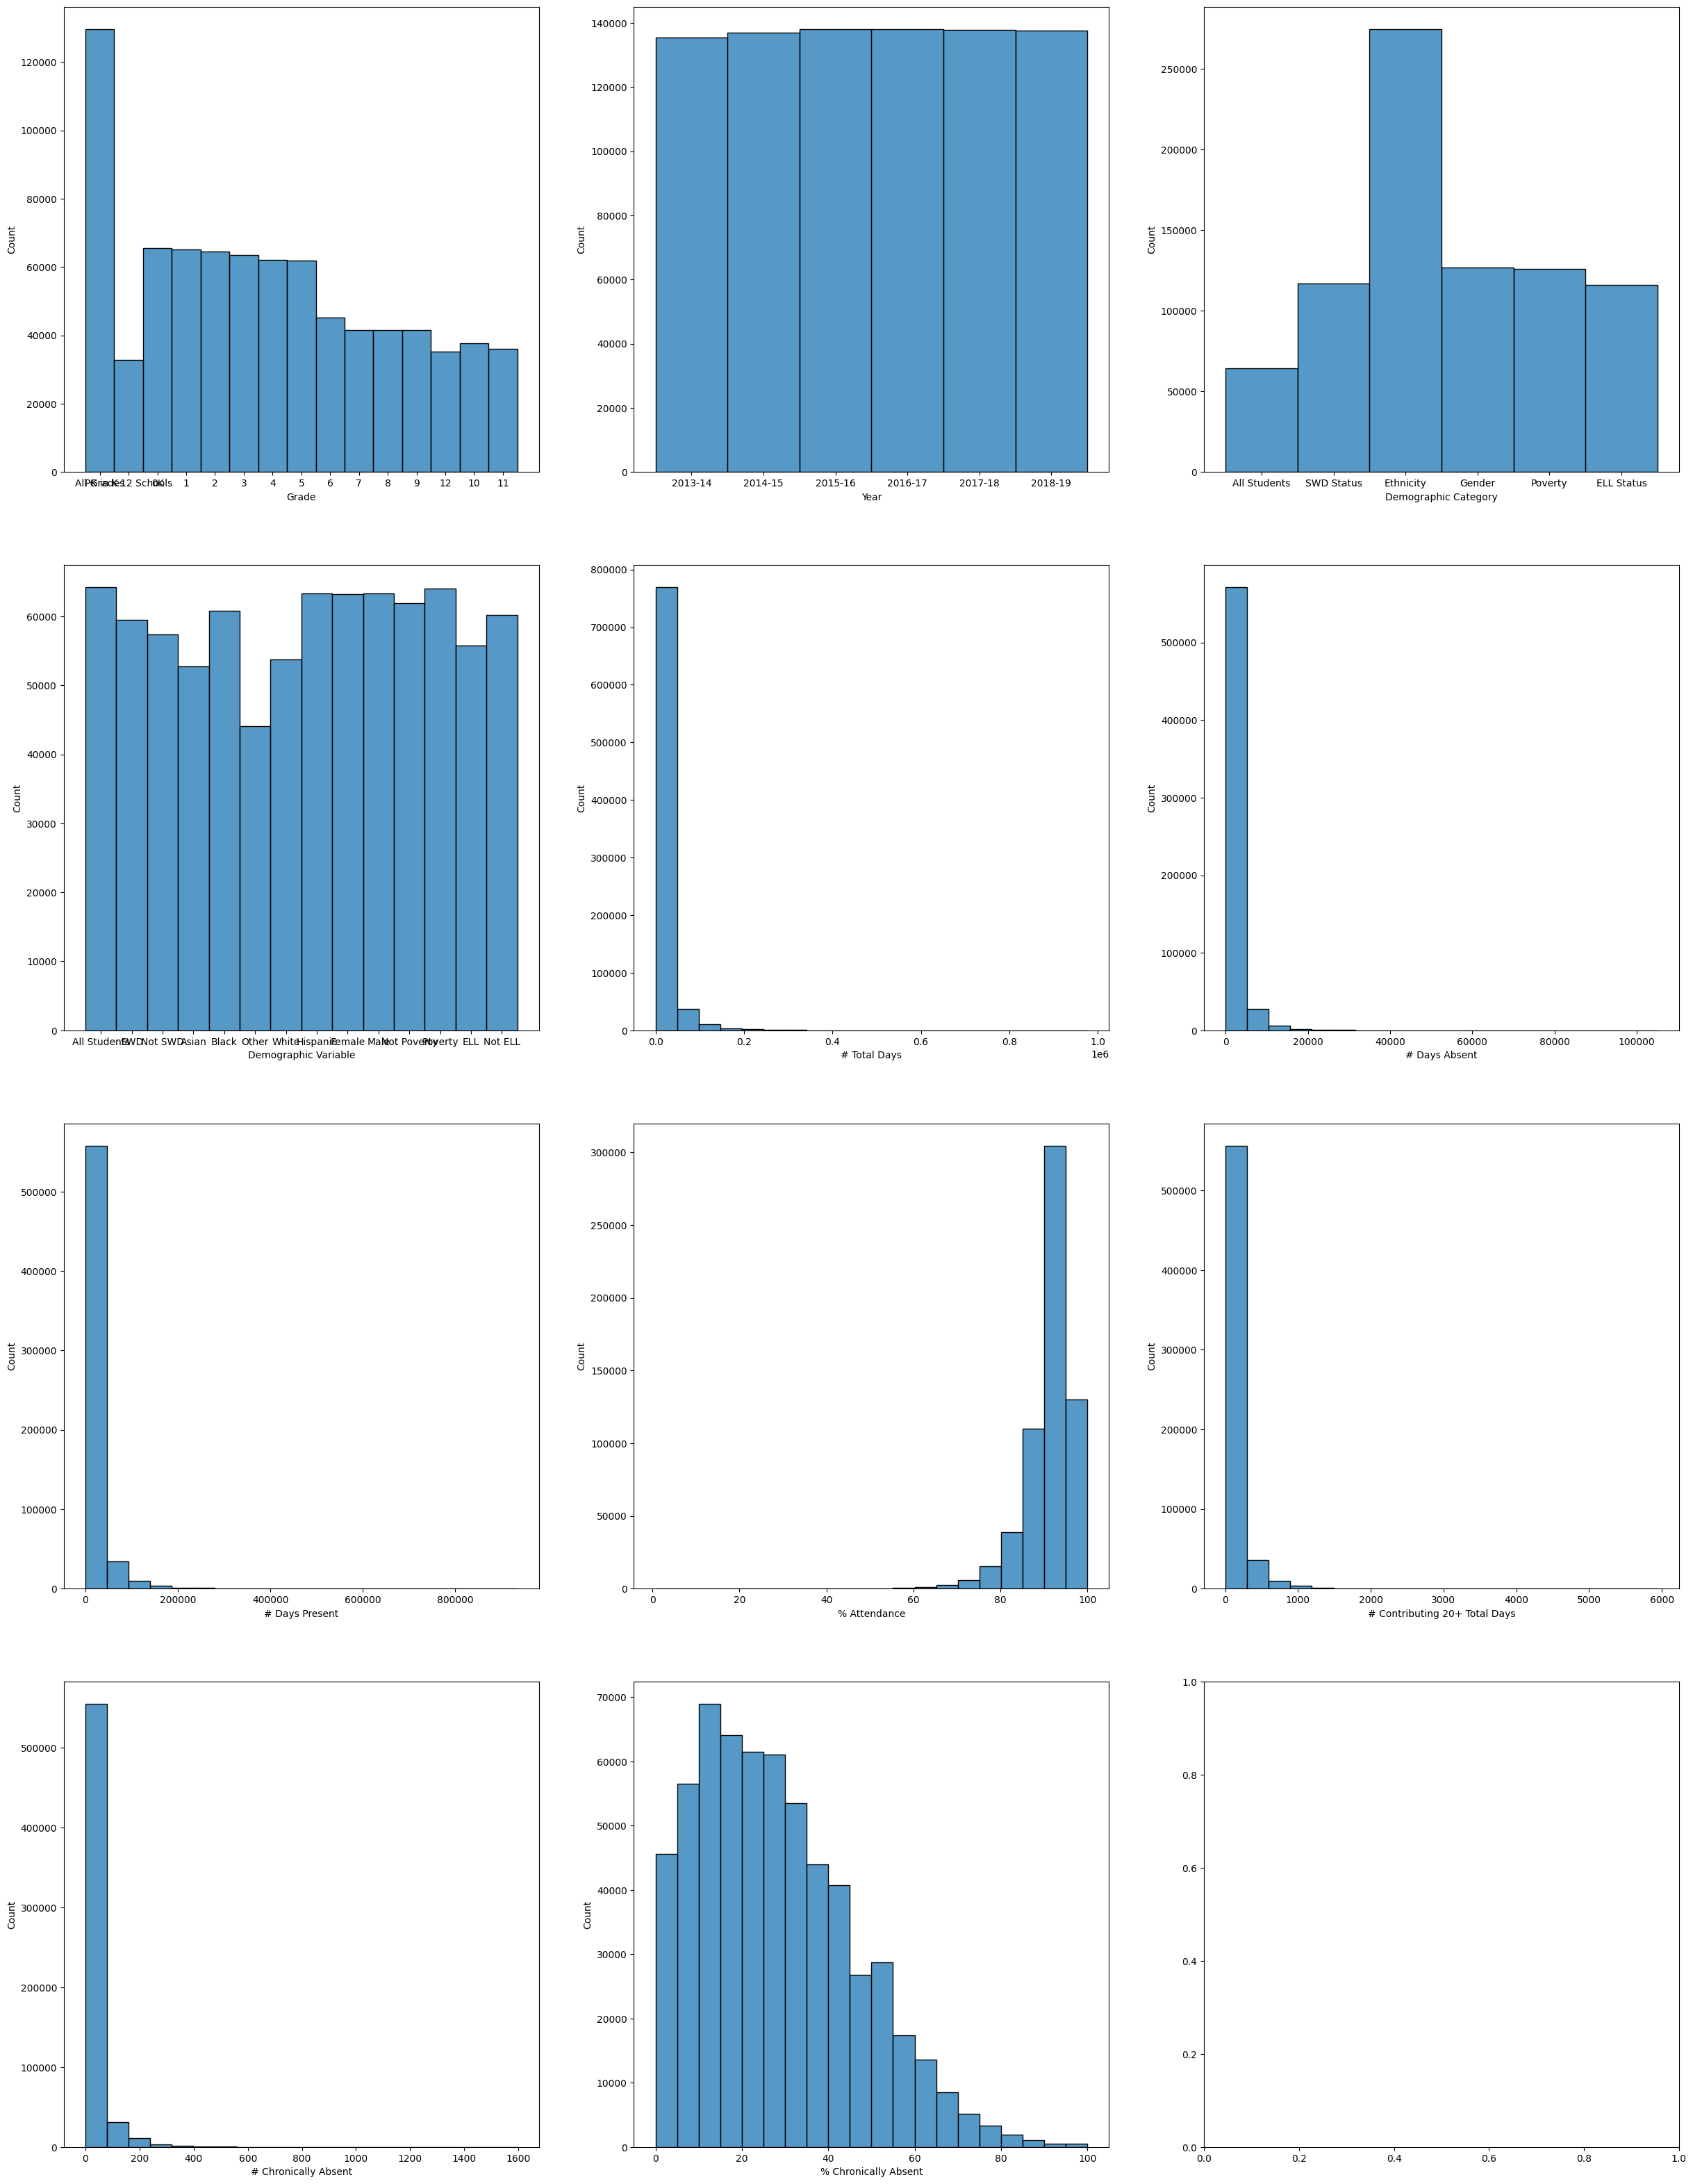

In [ ]:
fig, axes = plt.subplots(4,3, figsize=[30, 40])
i, j = 0, 0
for feature in students.columns[2:]:
    if j == 3:
        j = 0
        i+=1
    sns.histplot(ax=axes[i,j], x=feature, data=students, bins=20)
    j+=1

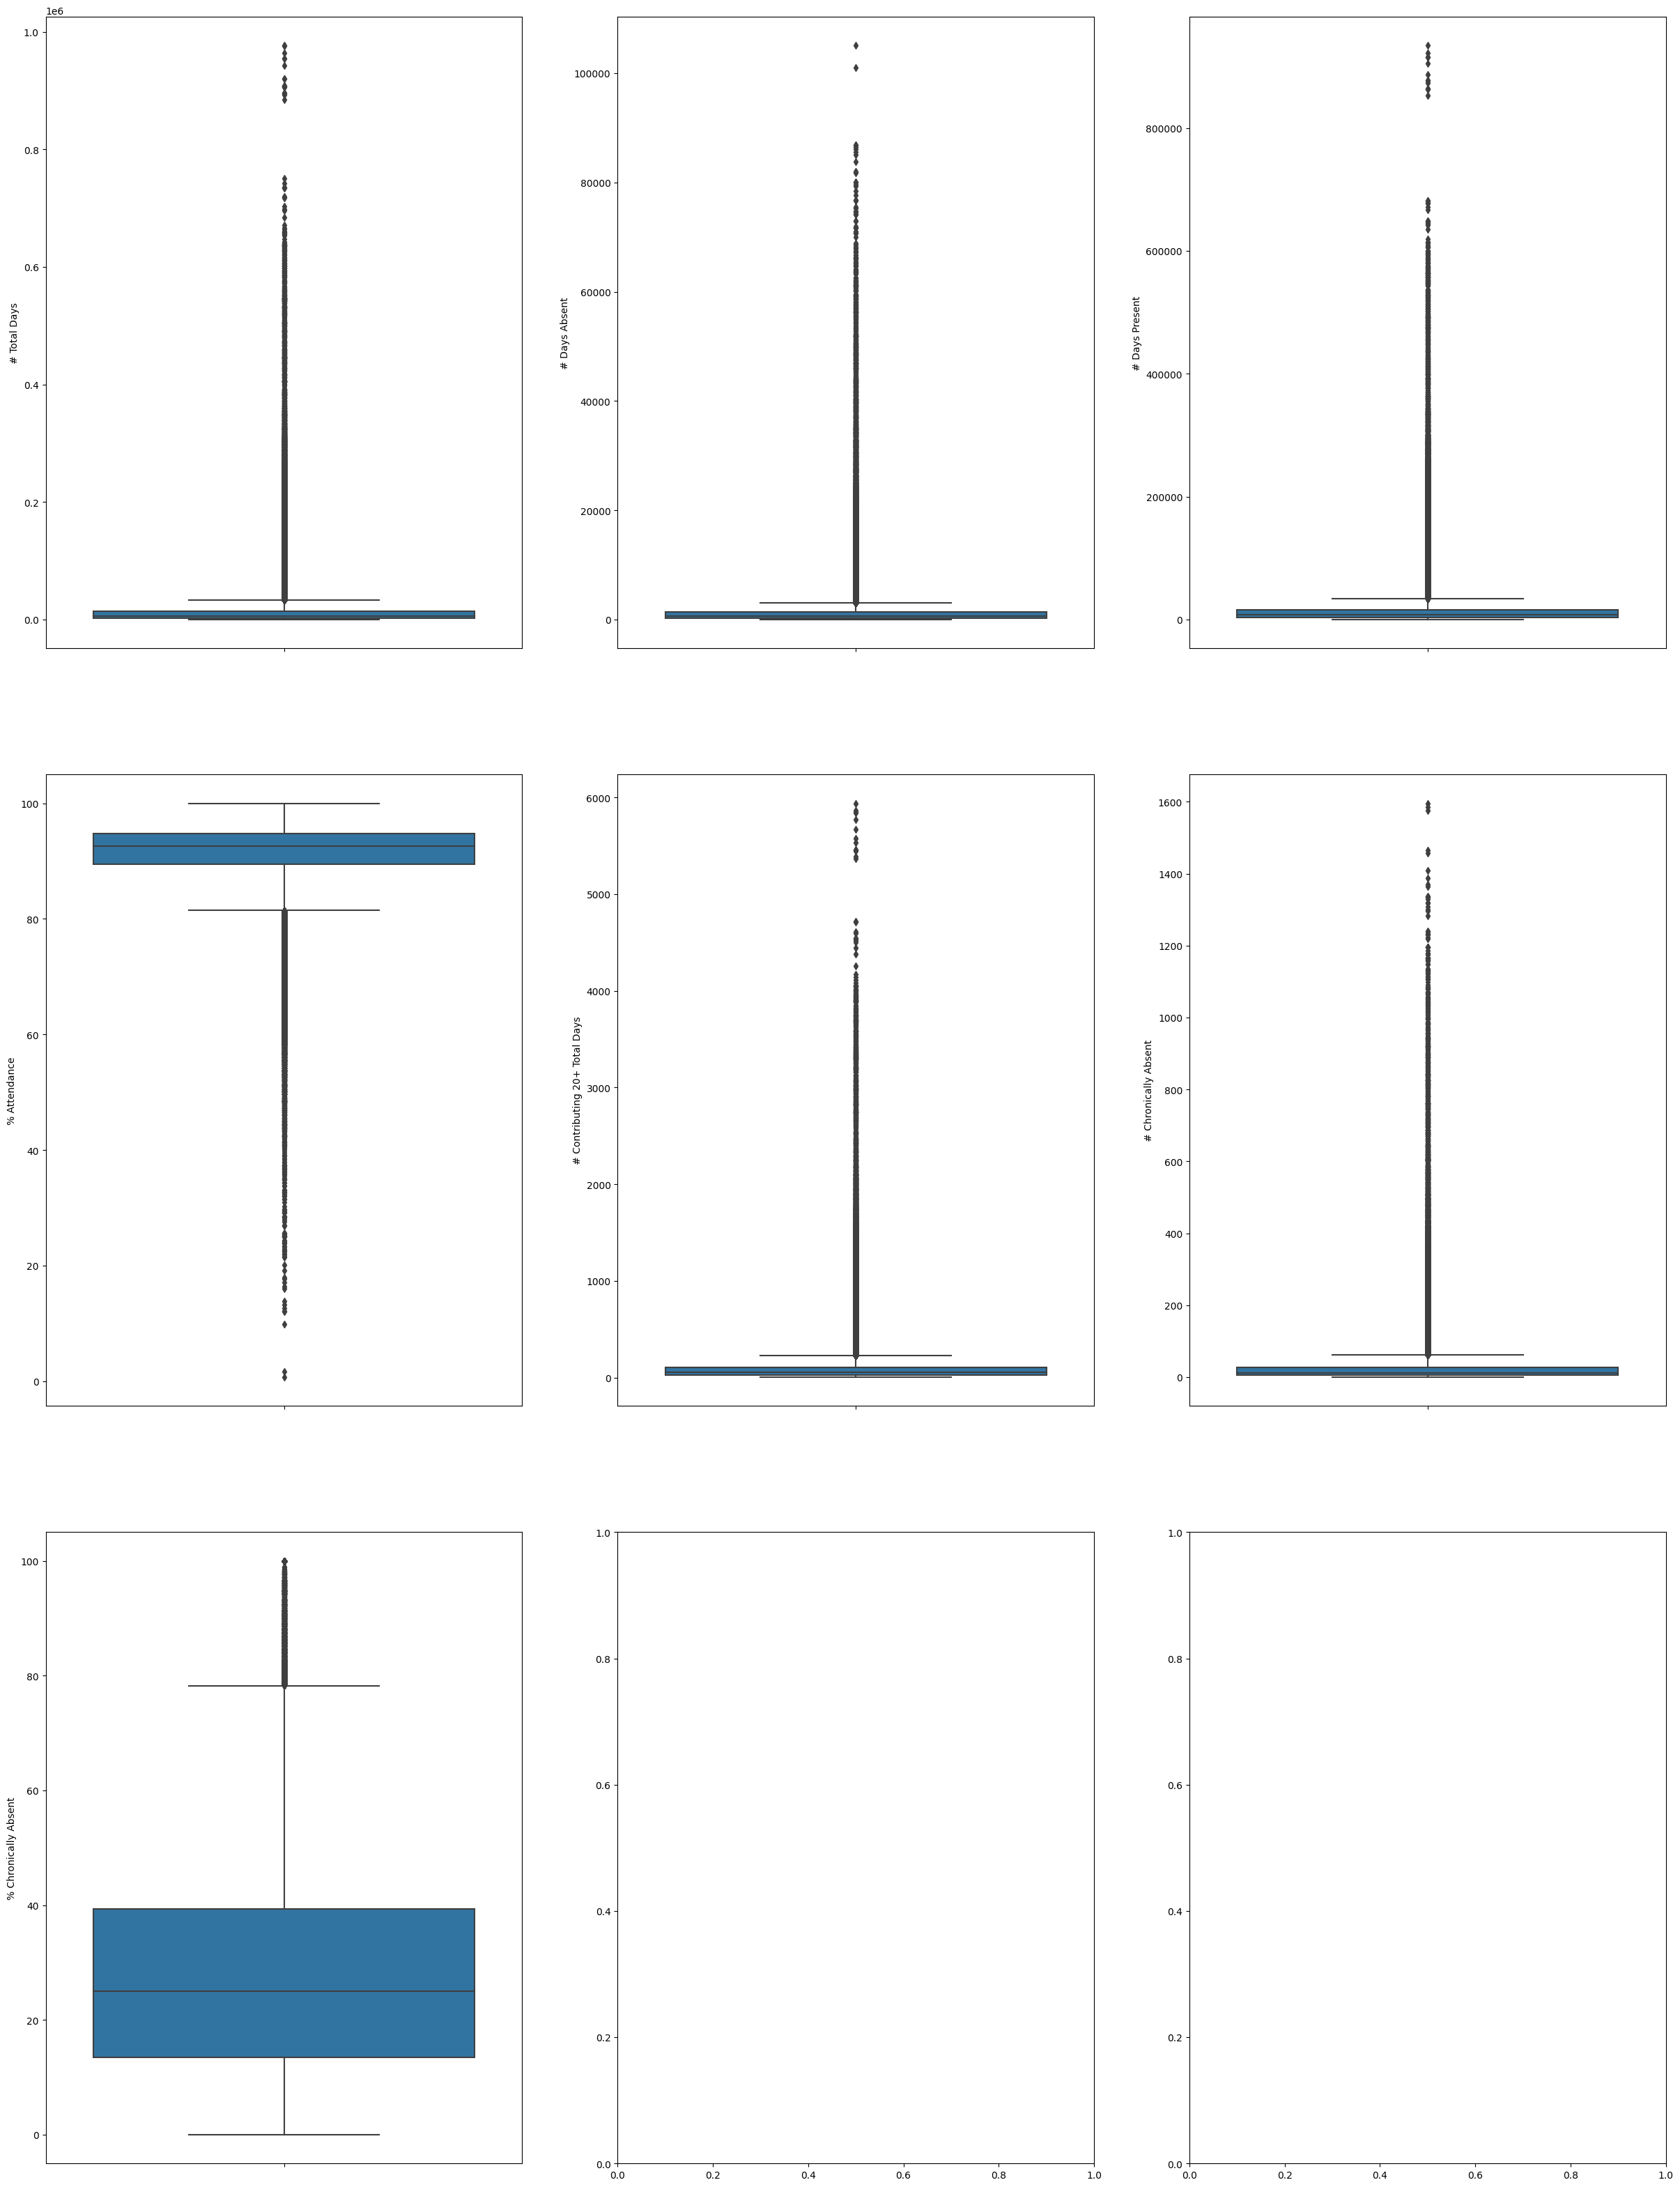

In [ ]:
fig, axes = plt.subplots(3,3, figsize=[30, 40])
i, j = 0, 0
for feature in students.columns[2:]:
    if np.issubdtype(students[feature].dtype, np.number):
        if j == 3:
            j = 0
            i += 1
        sns.boxplot(ax=axes[i, j], y=feature, data=students)
        j+=1

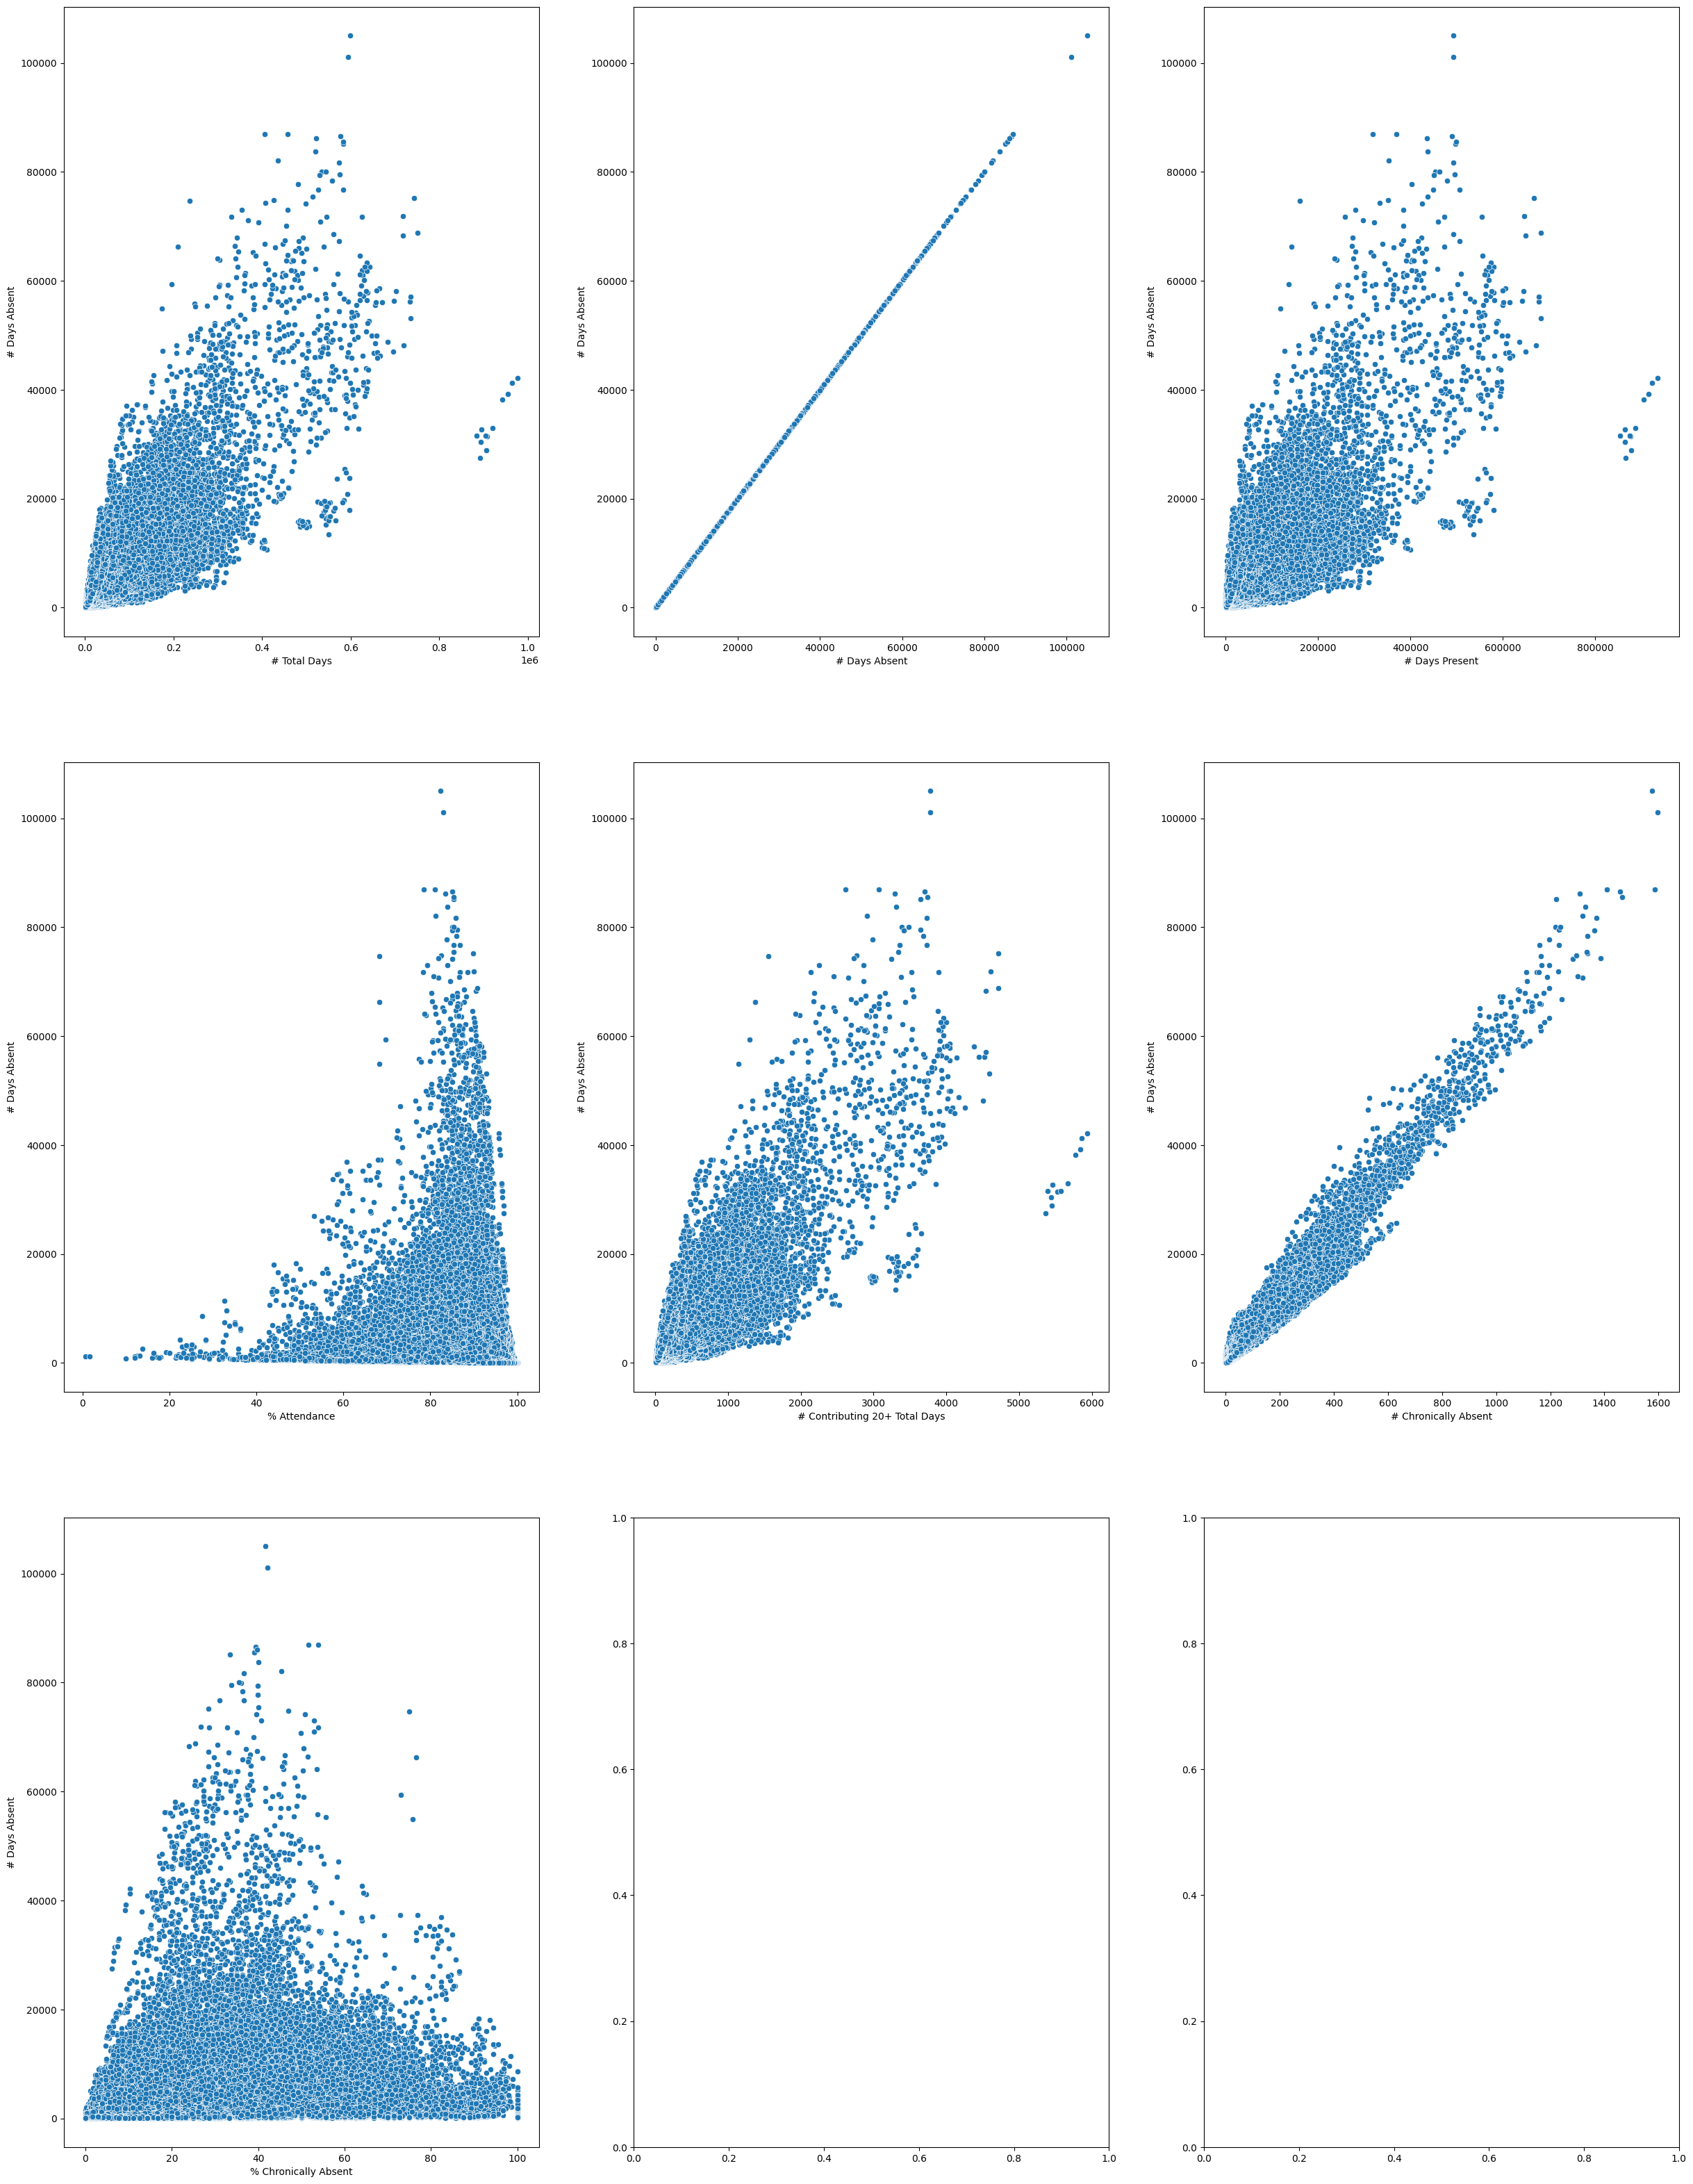

In [ ]:
fig, axes = plt.subplots(3,3, figsize=[30, 40])
i, j = 0, 0
for feature in students.columns[2:]:
    if np.issubdtype(students[feature].dtype, np.number):
        if j == 3:
            j = 0
            i += 1
        sns.scatterplot(ax=axes[i, j], y='# Days Absent', x=feature, data=students)
        j+=1

<Axes: >

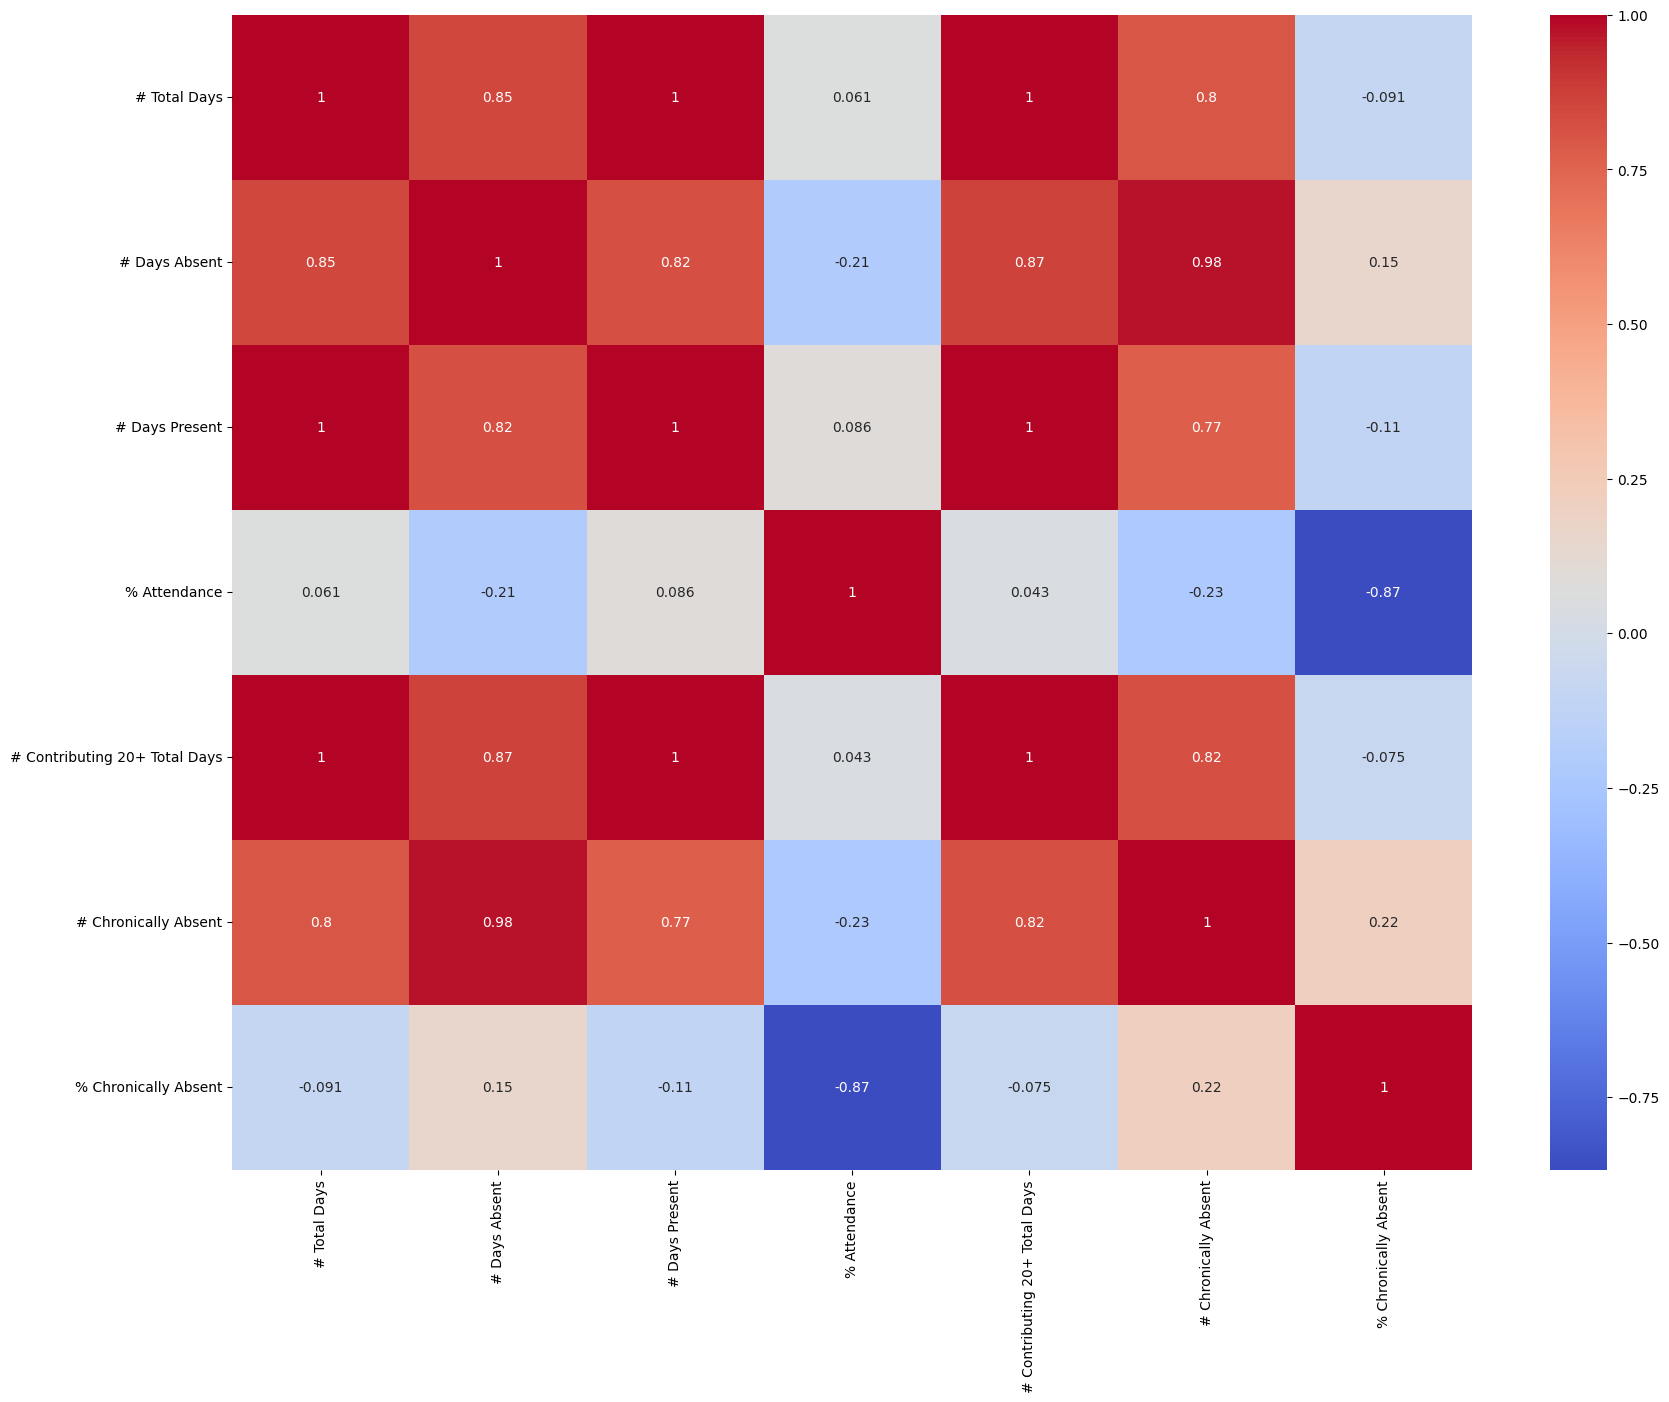

In [ ]:
numeric_columns = students.iloc[:].select_dtypes(include='number')
fig, axes = plt.subplots(1, 1, figsize=[20, 15])
sns.heatmap(numeric_columns.corr(),annot=True,cmap='coolwarm',ax=axes)

In [ ]:
mask1=students['Demographic Category']
mask2=mask1=="SWD Status"
log_data=students[mask2]
log_data=log_data.dropna(axis=0,how="any")
log_data['Y']=log_data['Demographic Variable'].apply(lambda x: 1 if x=="SWD" else 0)
log_data = log_data[(log_data['# Days Absent']>=3.0) & (log_data['# Days Absent']<=1424)]
log_data = log_data[(log_data['# Days Present']>=3332) & (log_data['# Days Present']<=15866)]

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder().set_output(transform='pandas')
encoded = encoder.fit_transform(log_data[['Grade']])
log_data['Z'] = encoded
log_data

,DBN,School Name,Grade,Year,Demographic Category,Demographic Variable,# Total Days,# Days Absent,# Days Present,% Attendance,# Contributing 20+ Total Days,# Chronically Absent,% Chronically Absent,Y,Z
3797,02M089,P.S. 89,5,2016-17,SWD Status,Not SWD,7728,242.0,7486.0,96.9,44.0,0.0,0.0,0,8.0
4352,02M089,P.S. 89,5,2017-18,SWD Status,Not SWD,6601,230.0,6371.0,96.5,38.0,1.0,2.6,0,8.0
4852,02M089,P.S. 89,5,2018-19,SWD Status,Not SWD,9256,330.0,8926.0,96.4,52.0,1.0,1.9,0,8.0
6586,06M314,Muscota,3,2015-16,SWD Status,Not SWD,7120,322.0,6798.0,95.5,40.0,2.0,5.0,0,6.0
7457,06M314,Muscota,3,2016-17,SWD Status,Not SWD,7421,248.0,7173.0,96.7,43.0,2.0,4.7,0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181032,75X596,P.S. X596,2,2018-19,SWD Status,SWD,11268,1012.0,10256.0,91.0,64.0,17.0,26.6,1,5.0
181035,75X596,P.S. X596,4,2018-19,SWD Status,SWD,12066,955.0,11111.0,92.1,69.0,25.0,36.2,1,7.0
181036,75X596,P.S. X596,5,2018-19,SWD Status,SWD,12982,1120.0,11862.0,91.4,74.0,26.0,35.1,1,8.0
181051,75X721,P.S. X721 - Stephen McSweeney School,9,2014-15,SWD Status,SWD,9898,1133.0,8765.0,88.6,59.0,24.0,40.7,1,12.0


<Axes: xlabel='# Days Absent', ylabel='# Contributing 20+ Total Days'>

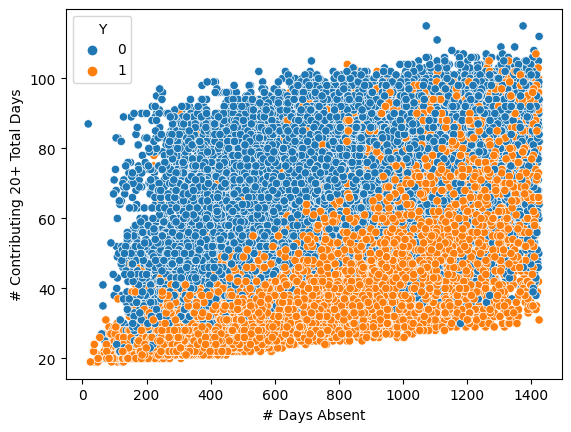

In [ ]:
X=log_data.loc[:,['# Contributing 20+ Total Days',"# Days Absent",'Z']]
y=log_data["Y"]
sns.scatterplot(data=log_data, x='# Days Absent', y='# Contributing 20+ Total Days', hue='Y')

<Axes: xlabel='Z', ylabel='# Contributing 20+ Total Days'>

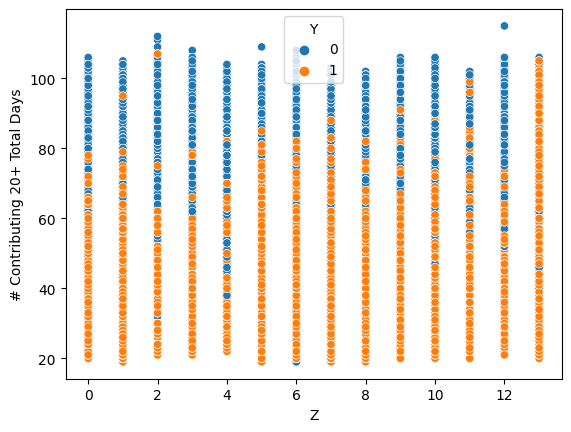

In [ ]:
sns.scatterplot(data=log_data, x='Z', y='# Contributing 20+ Total Days', hue='Y')

<Axes: xlabel='Y', ylabel='Z'>

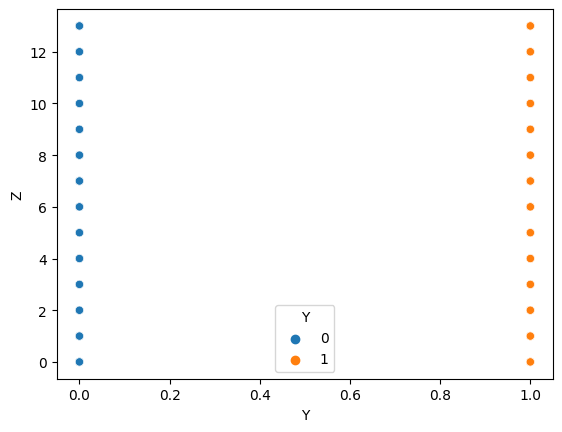

In [ ]:
sns.scatterplot(data=log_data, x='Y', y='Z', hue='Y')

<Axes: xlabel='Y', ylabel='Z'>

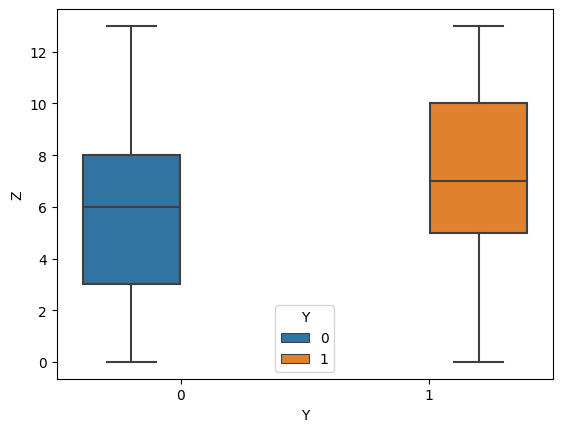

In [ ]:
sns.boxplot(data=log_data, x='Y', y='Z', hue='Y')

<Axes: xlabel='Y', ylabel='# Days Absent'>

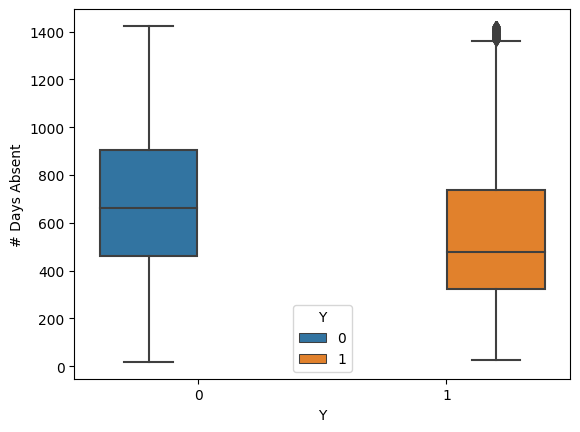

In [ ]:
sns.boxplot(data=log_data, x='Y', y='# Days Absent', hue='Y')

<Axes: xlabel='Y', ylabel='# Contributing 20+ Total Days'>

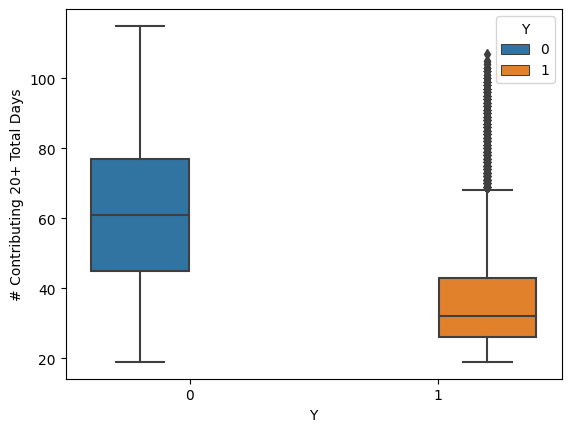

In [ ]:
sns.boxplot(data=log_data, x='Y', y='# Contributing 20+ Total Days', hue='Y')

In [ ]:
from sklearn.model_selection import train_test_split
X_train_LG, X_test_LG, y_train_LG, y_test_LG = train_test_split(X, y, test_size=0.3,)

from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
model_LG=lgr.fit(X_train_LG, y_train_LG)

from sklearn.metrics import accuracy_score

y_pred_LG = model_LG.predict(X_test_LG)
accuracy_LG=accuracy_score(y_test_LG,y_pred_LG,normalize=True)
slopes_LG=model_LG.coef_
intercept_LG=model_LG.intercept_
print(accuracy_LG)
print(slopes_LG)
print(intercept_LG)

0.7819468757135246
[[-0.100938    0.00250501  0.20017312]]
[1.72312078]


<Axes: xlabel='# Contributing 20+ Total Days', ylabel='Y'>

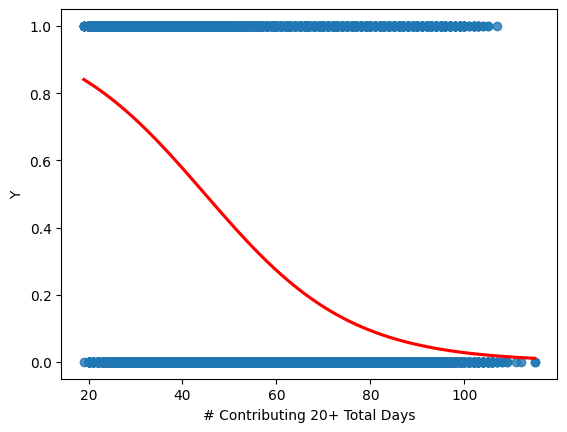

In [ ]:
sns.regplot(x=log_data.loc[:,"# Contributing 20+ Total Days"], y=y, data=log_data, logistic=True, ci=None, line_kws={"color": "red"})

<Axes: xlabel='# Days Absent', ylabel='Y'>

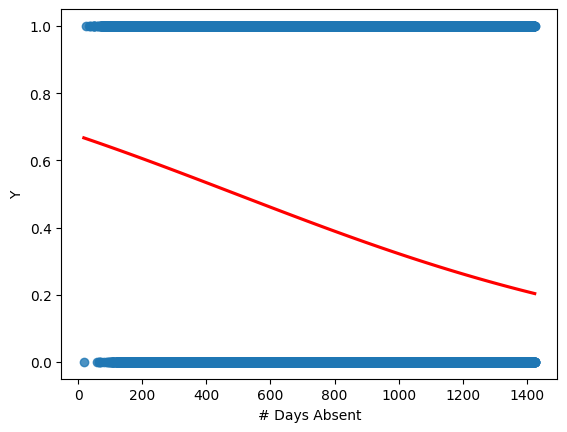

In [ ]:
sns.regplot(x=log_data.loc[:,"# Days Absent"], y=y, data=log_data, logistic=True, ci=None, line_kws={"color": "red"})

<Axes: xlabel='Z', ylabel='Y'>

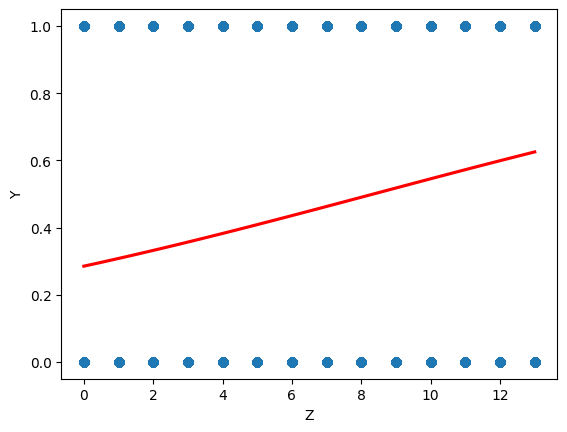

In [ ]:
sns.regplot(x=log_data.loc[:,"Z"], y=y, data=log_data, logistic=True, ci=None, line_kws={"color": "red"})

In [ ]:
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X, y, test_size=0.3,)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_LR=lr.fit(X_train_LR, y_train_LR)

from sklearn.metrics import r2_score

y_pred_LR = model_LR.predict(X_test_LR)
r2_score_LR=r2_score(y_test_LR, y_pred_LR)
slopes_LR=model_LR.coef_
intercept_LR=model_LR.intercept_
print(r2_score_LR)
print(slopes_LR)
print(intercept_LR)

0.360184350654983
[-0.01523557  0.00032899  0.02914337]
0.8203828909480639


<Axes: xlabel='# Days Absent', ylabel='Y'>

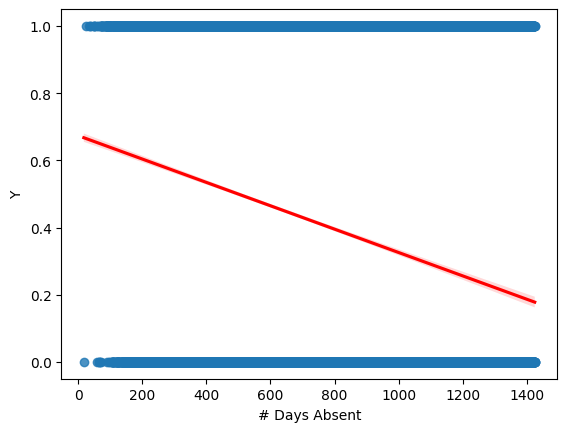

In [ ]:
sns.regplot(x="# Days Absent", y=y_train_LR, data=X_train_LR, line_kws={"color": "red"})

<Axes: xlabel='# Contributing 20+ Total Days', ylabel='Y'>

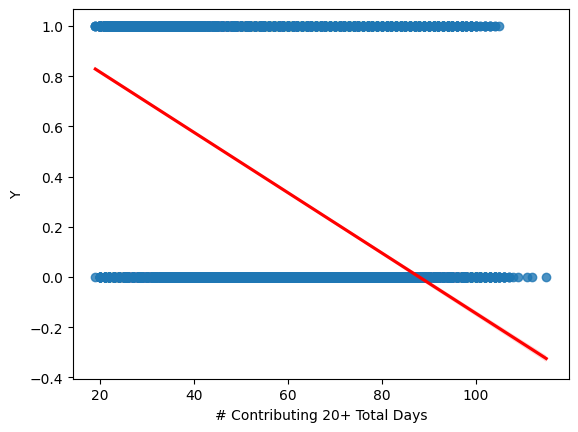

In [ ]:
sns.regplot(x="# Contributing 20+ Total Days", y=y_train_LR, data=X_train_LR, line_kws={"color": "red"})

<Axes: xlabel='Z', ylabel='Y'>

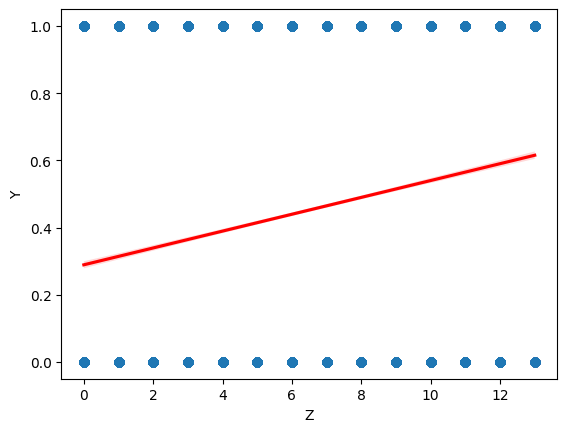

In [ ]:
sns.regplot(x="Z", y=y_train_LR, data=X_train_LR, line_kws={"color": "red"})